Dataset  has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this model, we will be working with some auto insurance data to demonstrate how we can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [126]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score ,roc_auc_score,roc_curve,plot_roc_curve

import warnings
warnings.filterwarnings("ignore")

In [72]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


Data set has missing values and values with "?" sign.

In [73]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [74]:
df.drop(columns='_c39',axis=1,inplace=True)#droping null comumn

In [75]:
#treating ? values
df.replace('?', np.nan, inplace = True)

In [76]:
df.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [77]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [78]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [79]:
df.fraud_reported.value_counts()#checking if dataset is balanced or not.
#we will use oversampling later to balance dataset.

N    753
Y    247
Name: fraud_reported, dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [81]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['policy_bind_day']=df['policy_bind_date'].dt.day
df['policy_bind_month']=df['policy_bind_date'].dt.month
df['policy_bind_year']=df['policy_bind_date'].dt.year
#extracting day.month, year from object data type

In [82]:
df.drop('policy_bind_date',axis=1,inplace=True)

In [83]:
df['incident_date']=pd.to_datetime(df['incident_date'])
df['incident_day']=df['incident_date'].dt.day
df['incident_month']=df['incident_date'].dt.month
df['incident_year']=df['incident_date'].dt.year
#extracting day.month, year from object data type

In [84]:
df.drop('incident_date',axis=1,inplace=True)

In [85]:
df.shape

(1000, 43)

In [86]:
df.drop_duplicates()#no duplicate entry

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,9,6,2000,22,2,2015
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990,1,10,2015
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N,16,7,1991,22,2,2015
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N,1,5,2014,24,1,2015
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,NO,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,17,2,2003,23,1,2015
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,NO,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,18,11,2011,26,2,2015


In [87]:
df.info()#checking data type and coverting into numerical value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [88]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries                   3
witnesses                   

In [89]:
df.drop('policy_number',axis=1,inplace=True)#policy_number is unique to every entry and will remain unique.

In [90]:
df.drop('incident_year',axis=1,inplace=True)#incident_year is same throughout entries.

In [91]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['auto_model']=le.fit_transform(df['auto_model'])
df['auto_make']=le.fit_transform(df['auto_make'])
df['police_report_available']=le.fit_transform(df['police_report_available'])
df['property_damage']=le.fit_transform(df['property_damage'])
df['incident_location']=le.fit_transform(df['incident_location'])
df['incident_city']=le.fit_transform(df['incident_city'])
df['incident_state']=le.fit_transform(df['incident_state'])
df['authorities_contacted']=le.fit_transform(df['authorities_contacted'])
df['incident_severity']=le.fit_transform(df['incident_severity'])
df['collision_type']=le.fit_transform(df['collision_type'])
df['incident_type']=le.fit_transform(df['incident_type'])
df['insured_relationship']=le.fit_transform(df['insured_relationship'])
df['insured_hobbies']=le.fit_transform(df['insured_hobbies'])
df['insured_occupation']=le.fit_transform(df['insured_occupation'])
df['insured_education_level']=le.fit_transform(df['insured_education_level'])
df['insured_sex']=le.fit_transform(df['insured_sex'])
df['insured_hobbies']=le.fit_transform(df['insured_hobbies'])
df['policy_csl']=le.fit_transform(df['policy_csl'])
df['policy_state']=le.fit_transform(df['policy_state'])
df['fraud_reported']=le.fit_transform(df['fraud_reported'])


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_csl                   1000 non-null   int32  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   int32  
 9   insured_education_level      1000 non-null   int32  
 10  insured_occupation           1000 non-null   int32  
 11  insured_hobbies              1000 non-null   int64  
 12  insured_relationship         1000 non-null   int32  
 13  capital-gains      

In [93]:
df.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,6.653000,9.731000,2.416000,25126.100000,-26793.700000,1.172000,1.022000,1.184000,2.167000,3.242000,2.966000,499.500000,11.644000,1.83900,0.302000,0.992000,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000,15.448000,6.559000,2001.604000,13.08400,3.407000
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,4.019048,5.674049,1.681003,27872.187708,28104.096686,1.081474,0.728043,0.939695,1.532142,2.155942,2.044266,288.819436,6.951373,1.01888,0.459355,0.820127,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483,8.850176,3.391758,7.360391,10.44318,3.276291
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000,1.000000,1.000000,1990.000000,1.00000,1.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51500.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,249.750000,6.000000,1.00000,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000,8.000000,4.000000,1995.000000,2.00000,1.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,-23250.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,499.500000,12.000000,1.00000,0.000000,1.000000,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000,16.000000,7.000000,2002.000000,15.00000,2.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,10.000000,15.000000,4.000000,51025.000000,0.000000,2.000000,2.000000,2.000000,4.000000,5.000000,5.000000,749.250000,17.000000,3.00000,1.000000,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000,23.000000,9.000000,2008.000000,22.00000,5.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,0.000000,3.000000,2.000000,3.000000,4.000000,6.000000,6.000000,999.000000,23.000000,4.00000,1.000000,2.000000,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.00000

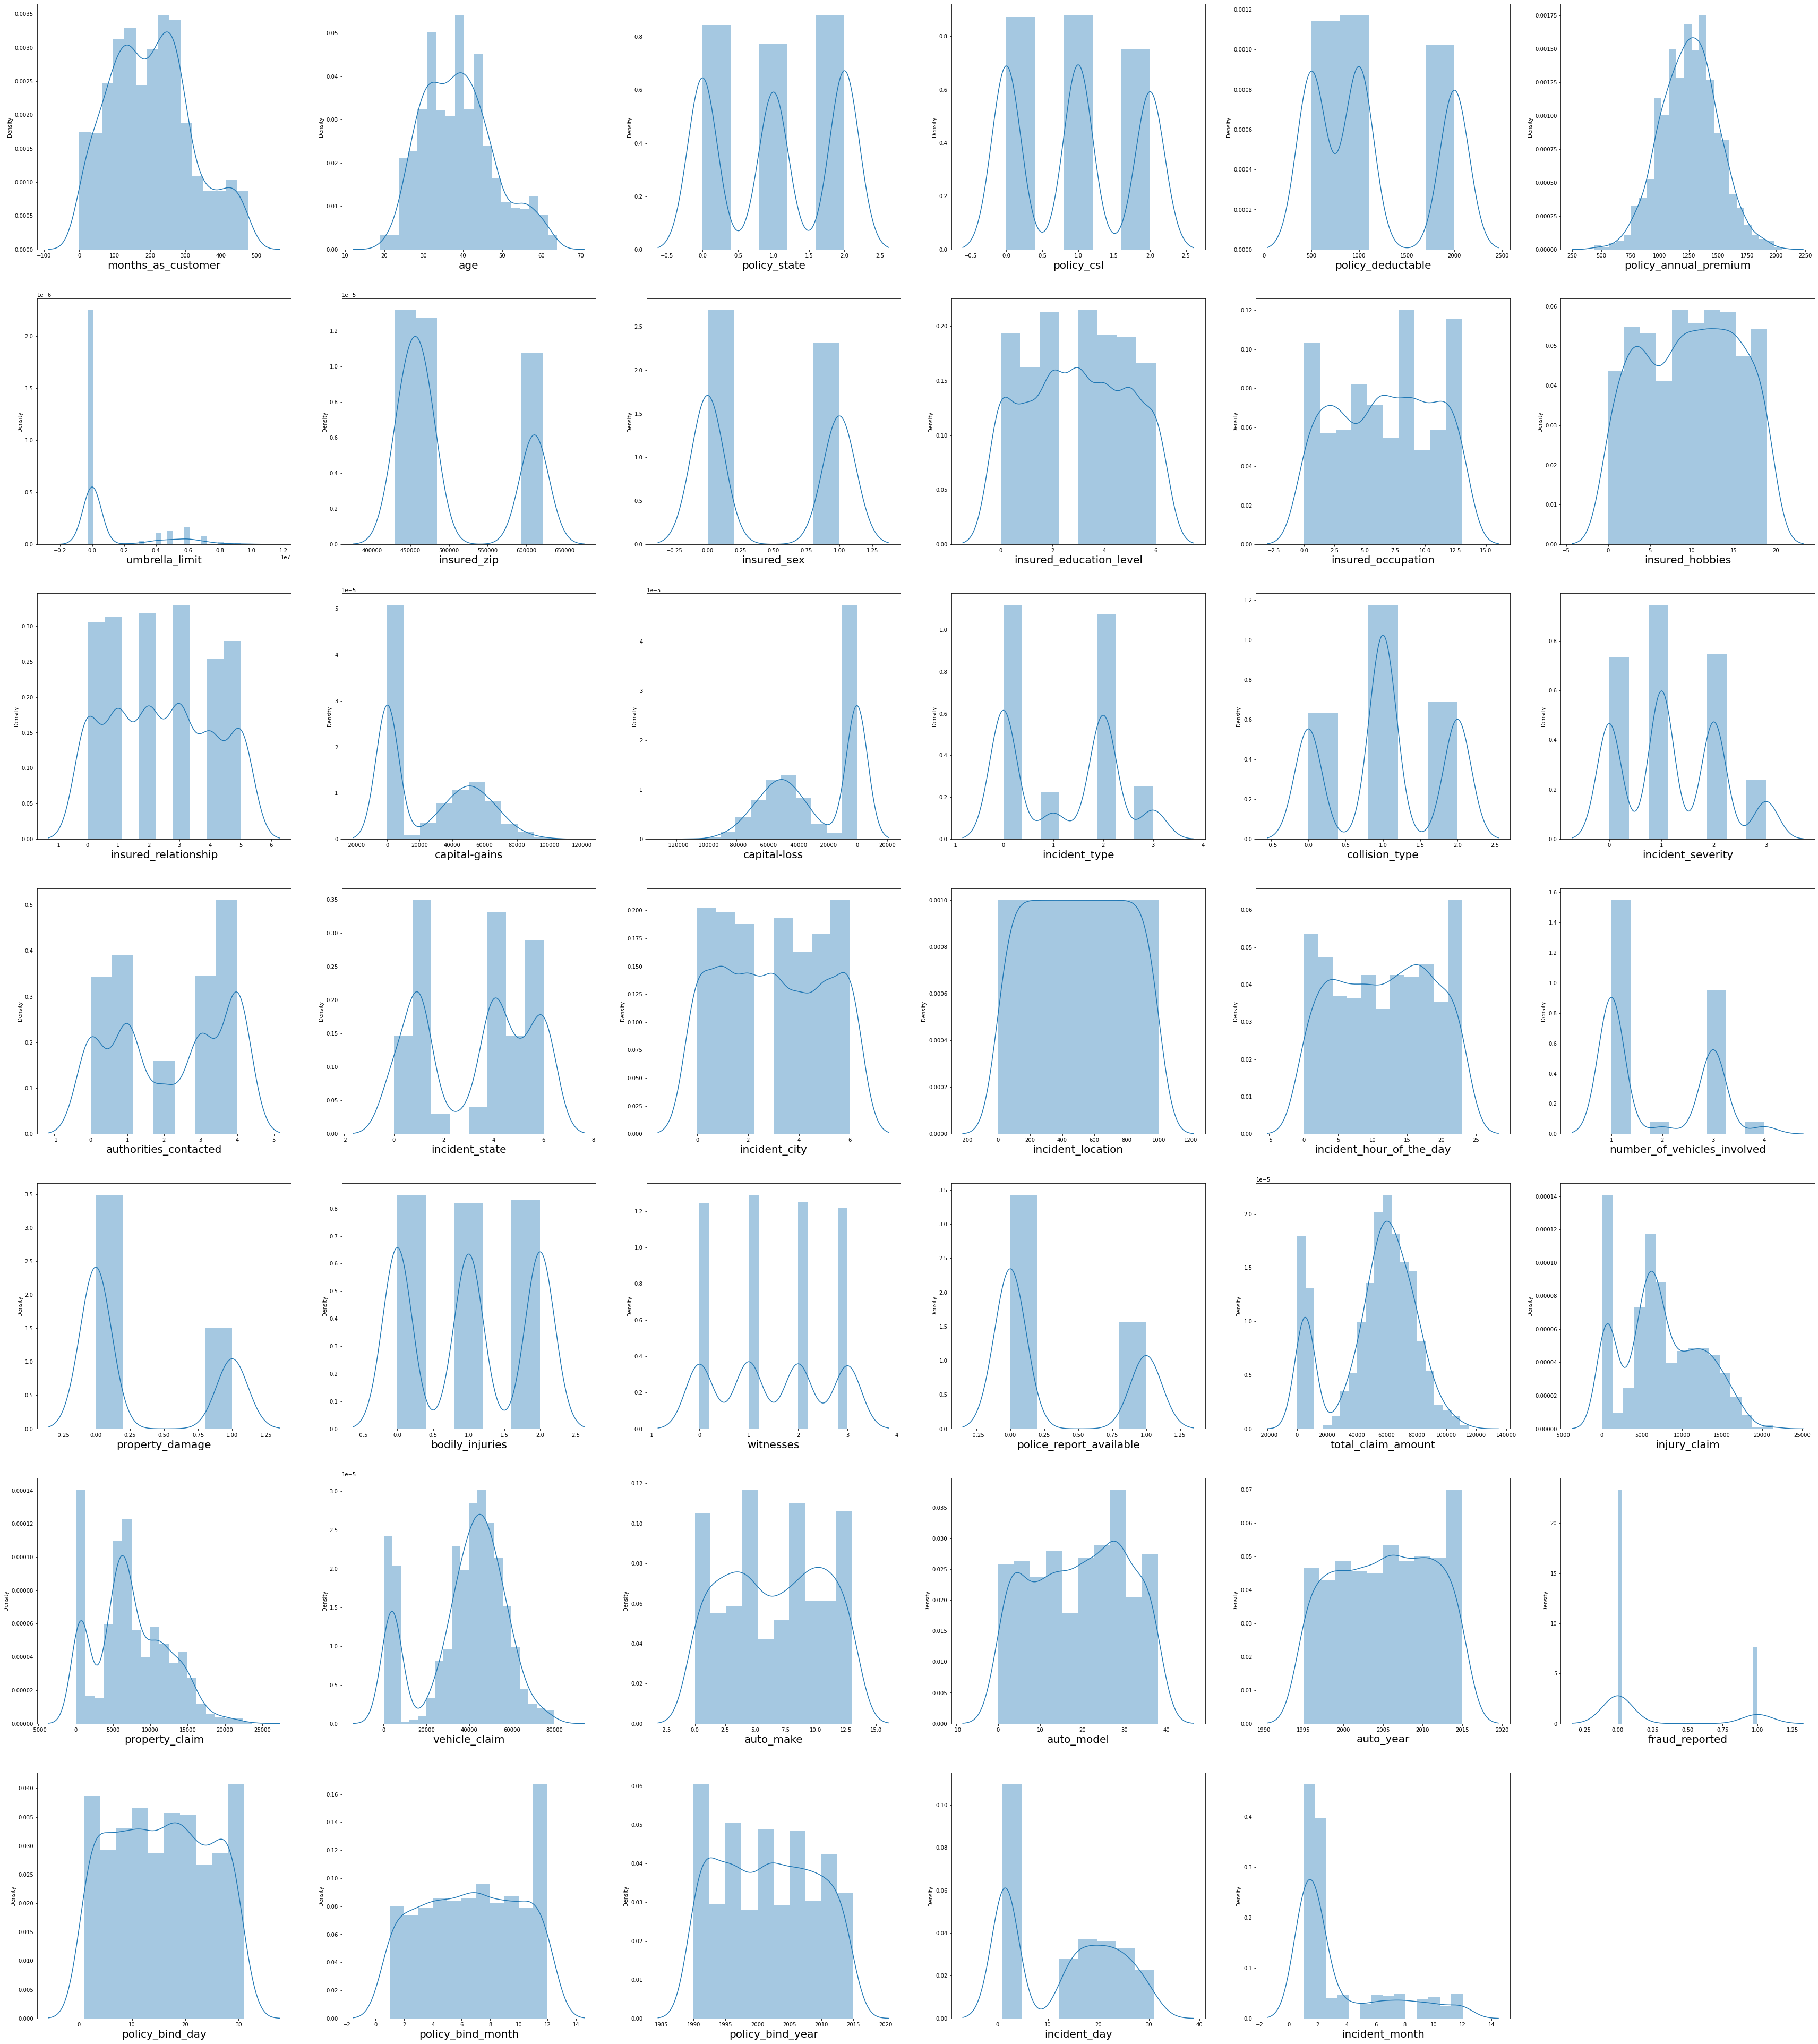

In [94]:
plt.figure(figsize=(60,80),facecolor='white')#checking data distribution wheather its normal (bell shape )
plotnumber=1
for column in df:
    if plotnumber<=41:
        ax=plt.subplot(8,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1  
plt.show()

All numerical features seems to be in normal distribution except capital_gain,capital_loss,total_claim_amount,injury_claim,property_claim,vehicle_claim.

In [95]:
df1=df.copy()

In [96]:
from scipy.stats import zscore #taking into consideration 99.7% data
z = np.abs(zscore(df))
df_new = df1[(z<3).all(axis = 1)]
df_new

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,48,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2,2,0,4,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1,17,10,2014,25,1
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,3,1,1,4,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1,27,6,2006,21,1
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,0,1,1,4,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0,9,6,2000,22,2
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,669,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014,1,25,5,1990,1,10
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,220,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0,6,6,2014,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,431289,0,5,2,13,4,0,0,2,0,1,1,0,4,561,20,1,1,0,1,0,87200,17440,8720,61040,6,6,2006,0,16,7,1991,22,2
996,285,41,0,0,1000,1436.79,0,608177,0,6,9,17,5,70900,0,2,1,0,1,4,3,227,23,1,1,2,3,0,108480,18080,18080,72320,13,28,2015,0,1,5,2014,24,1
997,130,34,2,1,500,1383.49,3000000,442797,0,5,1,3,2,35100,0,0,2,1,4,0,0,746,4,3,0,2,3,1,67500,7500,7500,52500,11,19,1996,0,17,2,2003,23,1
998,458,62,0,2,2000,1356.92,5000000,441714,1,0,5,0,5,0,0,2,1,0,3,1,0,569,2,1,0,0,1,1,46980,5220,5220,36540,1,5,1998,0,18,11,2011,26,2


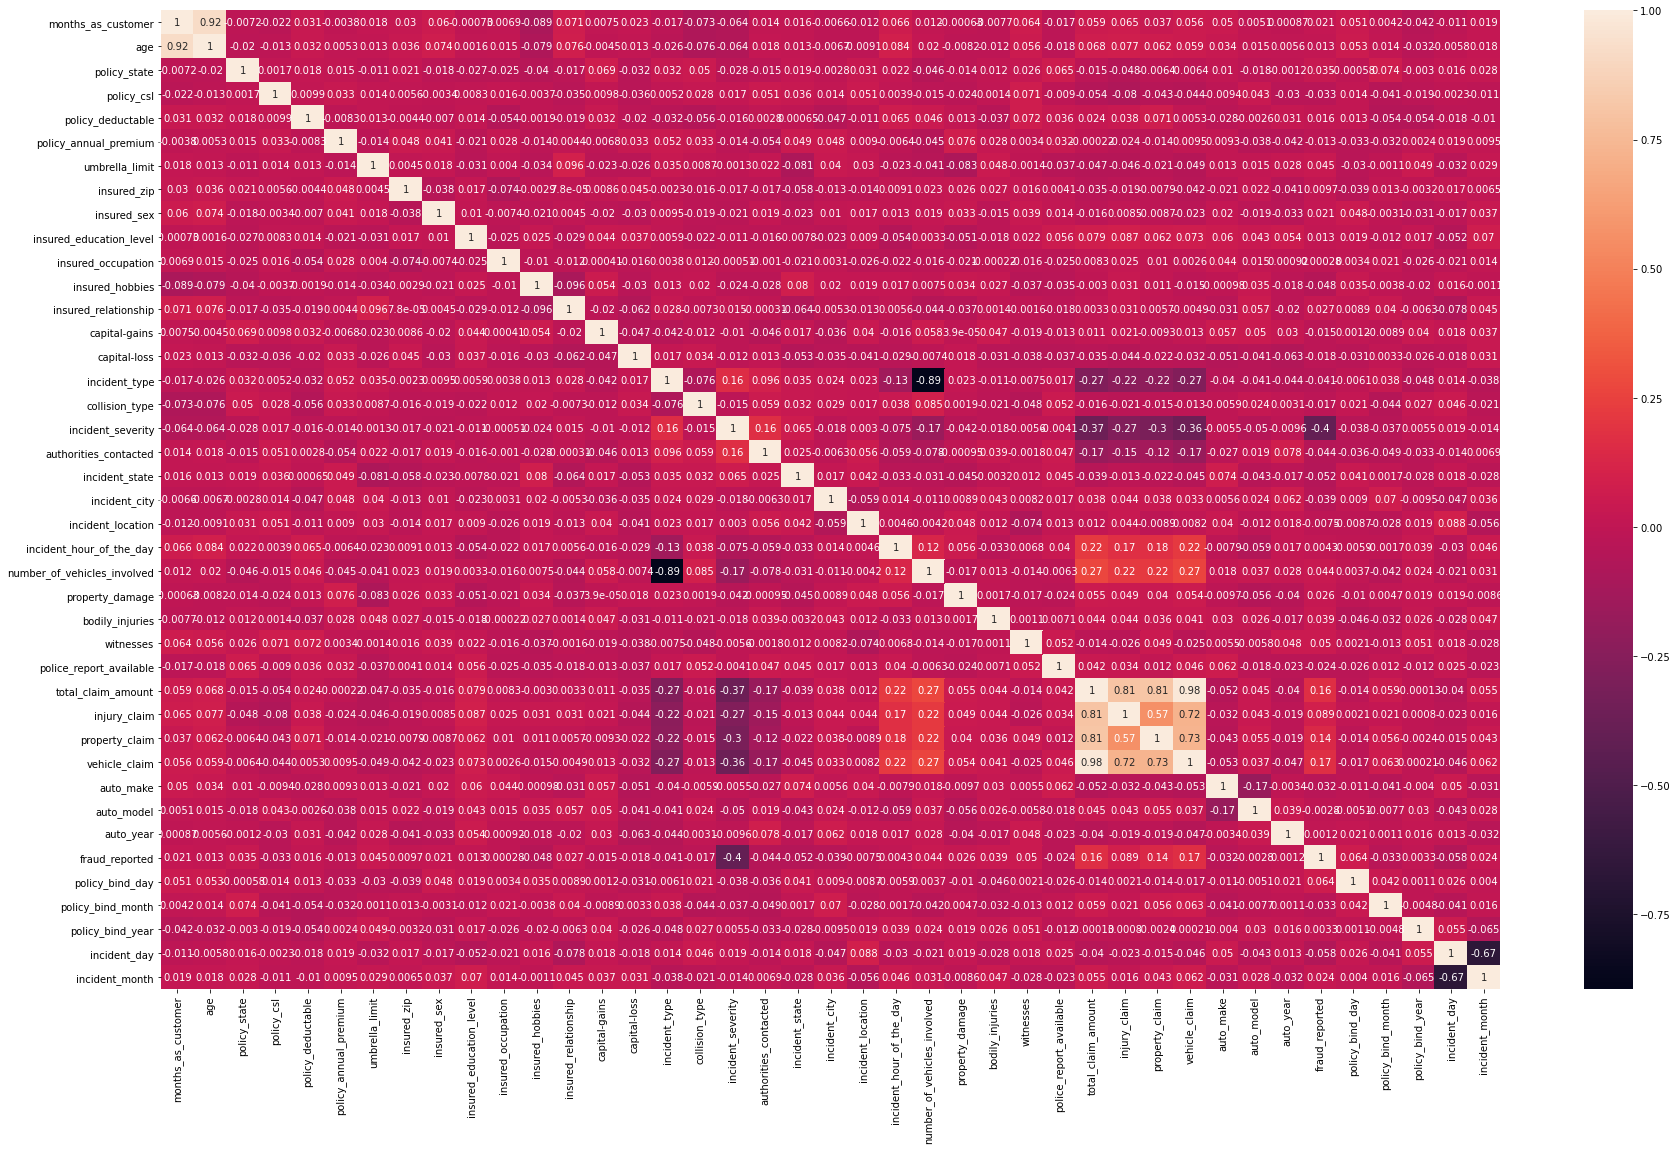

In [97]:
### Let's check multicollinearity
corr=df_new.corr()
plt.figure(figsize=(30,18))
sns.heatmap(data=corr,annot=True)
plt.show()

Total_claim_amount is correlated with vehicle claim,property_claim,injury_claim.

In [98]:
#checking correlation of features and target using corrwith
df_new.drop('fraud_reported',axis=1).corrwith(df_new.fraud_reported)

months_as_customer             0.021285
age                            0.013279
policy_state                   0.034587
policy_csl                    -0.032509
policy_deductable              0.015774
policy_annual_premium         -0.012686
umbrella_limit                 0.044729
insured_zip                    0.009699
insured_sex                    0.020582
insured_education_level        0.013116
insured_occupation             0.000277
insured_hobbies               -0.048181
insured_relationship           0.026575
capital-gains                 -0.014993
capital-loss                  -0.017617
incident_type                 -0.040893
collision_type                -0.016776
incident_severity             -0.401808
authorities_contacted         -0.043636
incident_state                -0.052027
incident_city                 -0.039434
incident_location             -0.007499
incident_hour_of_the_day       0.004326
number_of_vehicles_involved    0.043535
property_damage                0.025897


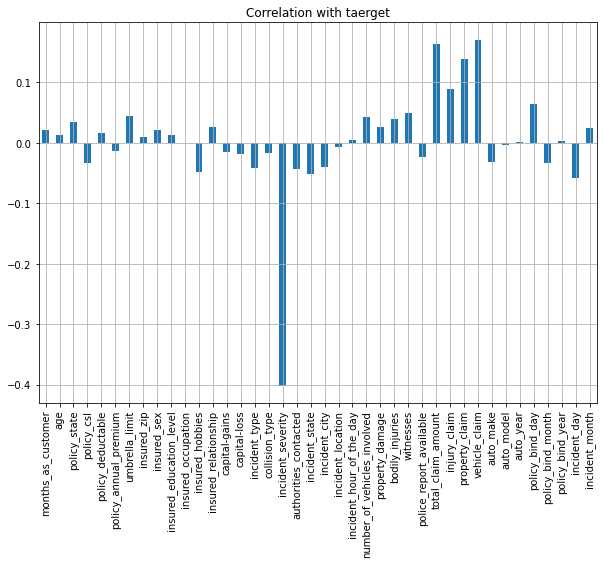

In [99]:
#visualising the correlation 
df_new.drop('fraud_reported',axis=1).corrwith(df_new.fraud_reported).plot(kind='bar',figsize=(10,7),title='Correlation with taerget',grid=True)
plt.show()

### Using Select Kbest  to get best 30 features.

In [100]:
X=df_new.drop('fraud_reported',axis=1)
y=df_new.fraud_reported

In [102]:
from sklearn.feature_selection import SelectKBest,f_classif
#f_classif uses anova for feature selection
best_fet=SelectKBest(score_func=f_classif,k=24)
fit=best_fet.fit(X,y)
score=pd.DataFrame(fit.scores_)
columns=pd.DataFrame(X.columns)
feature_score=pd.concat([score,columns],axis=1)
feature_score.columns=['score','feature']
print(feature_score.nlargest(24,'score'))

         score                      feature
17  188.298853            incident_severity
31   29.381634                vehicle_claim
28   27.020740           total_claim_amount
30   19.296650               property_claim
29    7.775306                 injury_claim
35    3.985265              policy_bind_day
38    3.338851                 incident_day
19    2.654395               incident_state
26    2.448596                    witnesses
11    2.275623              insured_hobbies
6     1.960578               umbrella_limit
18    1.865790        authorities_contacted
23    1.857101  number_of_vehicles_involved
15    1.638173                incident_type
20    1.523209                incident_city
25    1.503921              bodily_injuries
2     1.171317                 policy_state
36    1.040863            policy_bind_month
3     1.034655                   policy_csl
32    1.015477                    auto_make
12    0.691192         insured_relationship
24    0.656322              prop

In [103]:
X_new=df_new[['incident_severity','vehicle_claim','total_claim_amount','property_claim',
              'injury_claim','policy_bind_day','incident_day' , 'incident_state',
                  'witnesses',
             'insured_hobbies',
              'umbrella_limit',
       'authorities_contacted',
 'number_of_vehicles_involved',
              'incident_type',
               'incident_city',
             'bodily_injuries',
           'policy_state',
       'policy_bind_month',
                  'policy_csl',
                    'auto_make', 
              'insured_relationship',
              'property_damage',
               'incident_month',      
              'police_report_available']]

In [104]:
X_new.skew()#consider threshold to be=-.50
#vehicle_claim,total_claim_amount,umbrella_limit,incident_month,police_report_available have skewness.

incident_severity              0.277726
vehicle_claim                 -0.620936
total_claim_amount            -0.593593
property_claim                 0.361356
injury_claim                   0.271759
policy_bind_day                0.028152
incident_day                   0.055443
incident_state                -0.149255
witnesses                      0.026211
insured_hobbies               -0.061488
umbrella_limit                 1.801424
authorities_contacted         -0.114044
number_of_vehicles_involved    0.509725
incident_type                  0.090563
incident_city                  0.043882
bodily_injuries                0.003757
policy_state                  -0.038157
policy_bind_month             -0.024643
policy_csl                     0.098248
auto_make                     -0.028739
insured_relationship           0.078339
property_damage                0.853093
incident_month                 1.388336
police_report_available        0.796221
dtype: float64

In [105]:
#Removing skewness using yeo-johnson method



from sklearn.preprocessing import power_transform
X_skew=power_transform(X_new,method='yeo-johnson')

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_skew)


In [111]:

from imblearn.over_sampling import SMOTE
sme = SMOTE(random_state=42)
sme.fit(X_scaled, y)
X_resampled, Y_resampled = sme.fit_resample(X_scaled, y)

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,Y_resampled,test_size=.30,random_state=343)

### Logistic_regression

In [119]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=log_reg.predict(X_train)
print('Training score:',log_reg.score(X_train,y_train))
print('Testing score:',log_reg.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(log_reg,X_resampled,Y_resampled,cv=5)
print('Cross_validation_score:',cvs.mean())

0.7905405405405406
[[177  52]
 [ 41 174]] 

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       229
           1       0.77      0.81      0.79       215

    accuracy                           0.79       444
   macro avg       0.79      0.79      0.79       444
weighted avg       0.79      0.79      0.79       444

Training score: 0.7577220077220077
Testing score: 0.7905405405405406
Cross_validation_score: 0.7668918918918919


### Decision_tree_classifier

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred=dt.predict(X_test)
print(accuracy_score(y_pred,y_test))

cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=dt.predict(X_train)
print('Training score:',dt.score(X_train,y_train))
print('Testing score:',dt.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(dt,X_resampled,Y_resampled,cv=5)
print('Cross_validation_score:',cvs.mean())

0.8513513513513513
[[191  38]
 [ 28 187]] 

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       229
           1       0.83      0.87      0.85       215

    accuracy                           0.85       444
   macro avg       0.85      0.85      0.85       444
weighted avg       0.85      0.85      0.85       444

Training score: 1.0
Testing score: 0.8513513513513513
Cross_validation_score: 0.8331081081081081


### Random Forest Classifier

In [121]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
train_pred=rf.predict(X_train)
y_pred=rf.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=rf.predict(X_train)
print('Training score:',rf.score(X_train,y_train))
print('Testing score:',rf.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,X_resampled,Y_resampled,cv=5)
print('Cross_validation_score:',cvs.mean())

0.9054054054054054
[[215  14]
 [ 28 187]] 

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       229
           1       0.93      0.87      0.90       215

    accuracy                           0.91       444
   macro avg       0.91      0.90      0.91       444
weighted avg       0.91      0.91      0.91       444

Training score: 1.0
Testing score: 0.9054054054054054
Cross_validation_score: 0.8756756756756758


### Ada boost Classifier

In [122]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)


print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=ada.predict(X_train)
print('Training score:',ada.score(X_train,y_train))
print('Testing score:',ada.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(ada,X_resampled,Y_resampled,cv=5)
print('Cross_validation_score:',cvs.mean())

0.8896396396396397
[[210  19]
 [ 30 185]] 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       229
           1       0.91      0.86      0.88       215

    accuracy                           0.89       444
   macro avg       0.89      0.89      0.89       444
weighted avg       0.89      0.89      0.89       444

Training score: 0.88996138996139
Testing score: 0.8896396396396397
Cross_validation_score: 0.8412162162162161


### XGBoost Classifier

In [124]:
import xgboost as xgb
xgb=xgb.XGBClassifier()

xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)


print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=xgb.predict(X_train)
print('Training score:',xgb.score(X_train,y_train))
print('Testing score:',xgb.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(xgb,X_resampled,Y_resampled,cv=5)
print('Cross_validation_score:',cvs.mean())

[13:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9099099099099099
[[208  21]
 [ 19 196]] 

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       229
           1       0.90      0.91      0.91       215

    accuracy                           0.91       444
   macro avg       0.91      0.91      0.91       444
weighted avg       0.91      0.91      0.91       444

Training score: 1.0
Testing score: 0.9099099099099099
[13:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metri

### ROC_AUC curve

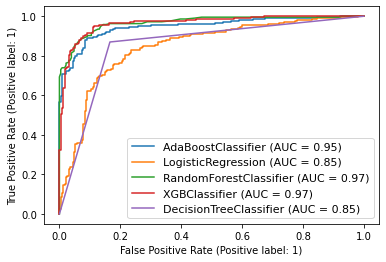

In [127]:
#Let's find best model using Reciever's operating curve by calculating area_under_the_curve
disp=plot_roc_curve(ada,X_test,y_test)
plot_roc_curve(log_reg,X_test,y_test,ax=disp.ax_) #ax_=Axes with confusion matrix of adaboost
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

### Hyper parameter tuning of XG Boost model.

In [128]:
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [133]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=3, scoring='roc_auc')
gs2.fit(X_train, y_train)

print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

[13:51:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best score: 0.9396820154962571
Best score: {'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 0.5}


In [136]:
import xgboost as xgb
xgb=xgb.XGBClassifier(base_score=.2,booster='gbtree',gamma=0,learning_rate=0.1,n_estimators=500,reg_alpha=0,
                      reg_lambda=0.5)

In [139]:
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
accuracy

[13:58:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9054054054054054

In [ ]:
#saving the model in local system
import pickle
filename='finalized_insurance_claim.pickle'
pickle.dump(,open(filename,'wb'))